# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,1
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
46,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065,0
50,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
96,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625,1
154,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640,2
107,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488,1
43,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,0
72,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472,1


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [3]:
# separate futures and labels
features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline']
label = 'WineVariety'
X, y = data[features].values, data[label].values

In [11]:
for n in range(0,4):
    print('Wine variety', str(n+1), '\n fetures:', list(X[n]), '\n labels:', y[n])

Wine variety 1 
 fetures: [14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0] 
 labels: 0
Wine variety 2 
 fetures: [13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4, 1050.0] 
 labels: 0
Wine variety 3 
 fetures: [13.16, 2.36, 2.67, 18.6, 101.0, 2.8, 3.24, 0.3, 2.81, 5.68, 1.03, 3.17, 1185.0] 
 labels: 0
Wine variety 4 
 fetures: [14.37, 1.95, 2.5, 16.8, 113.0, 3.85, 3.49, 0.24, 2.18, 7.8, 0.86, 3.45, 1480.0] 
 labels: 0


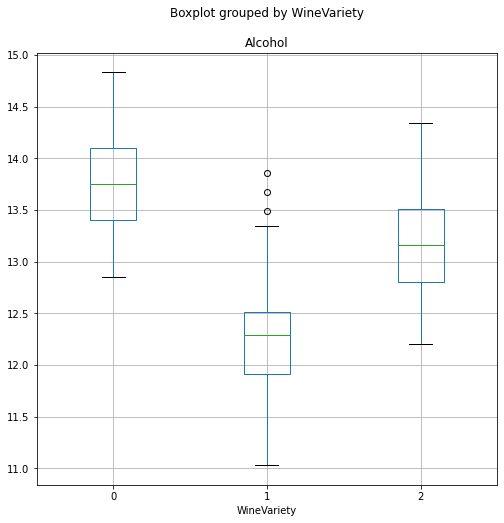

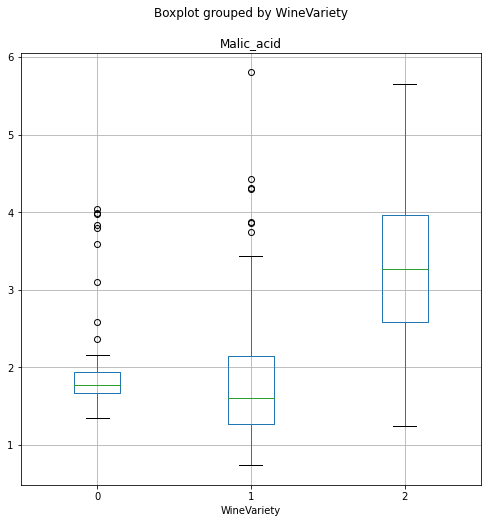

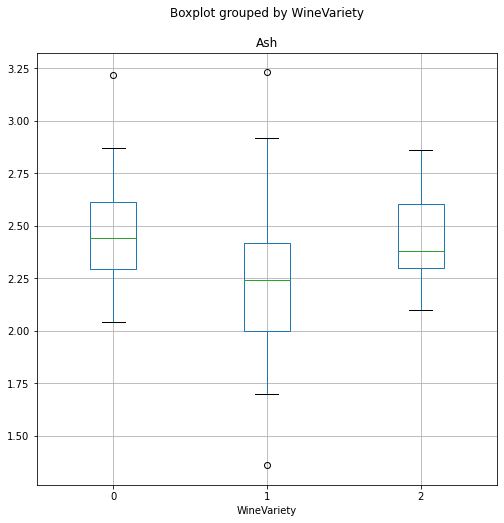

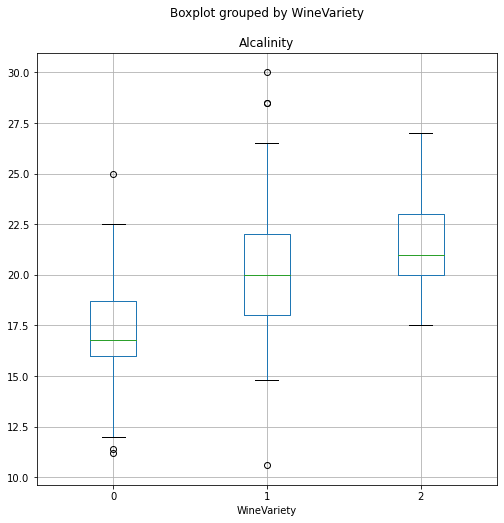

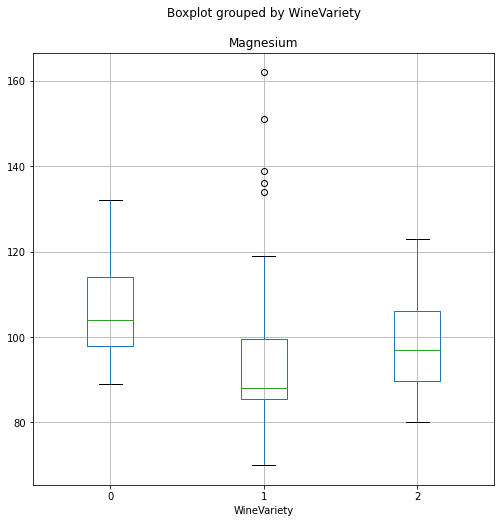

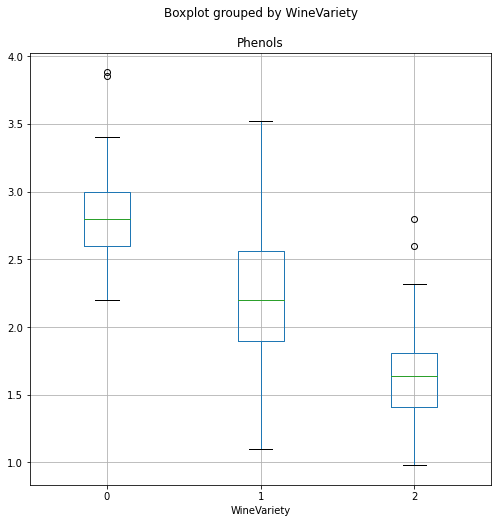

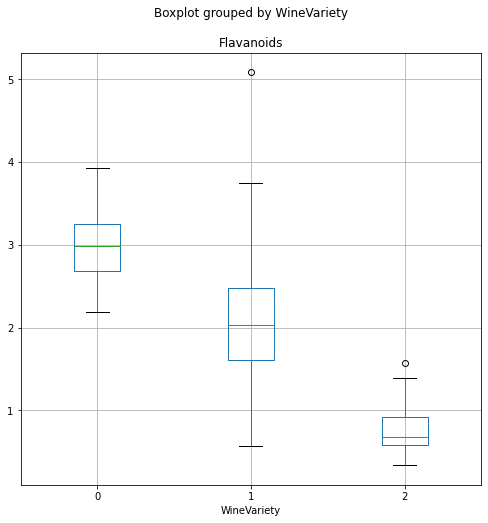

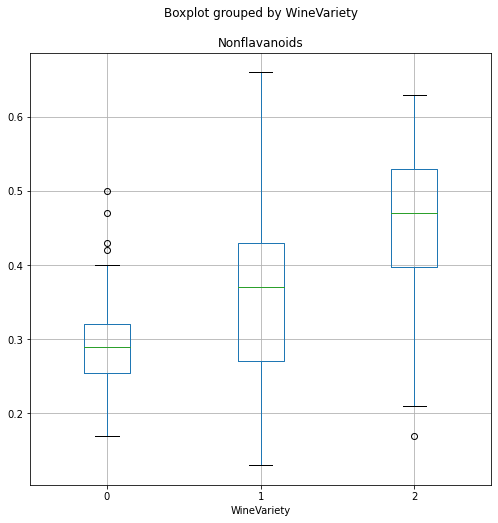

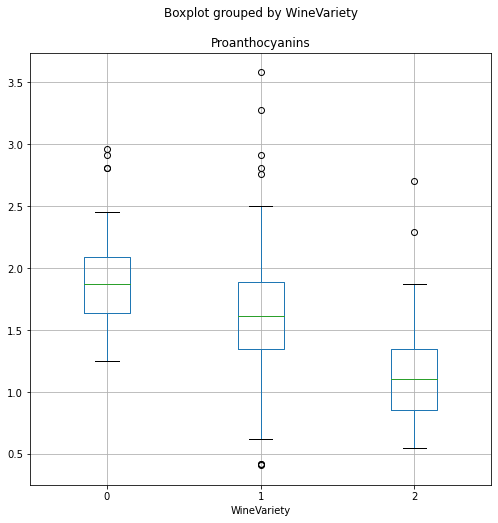

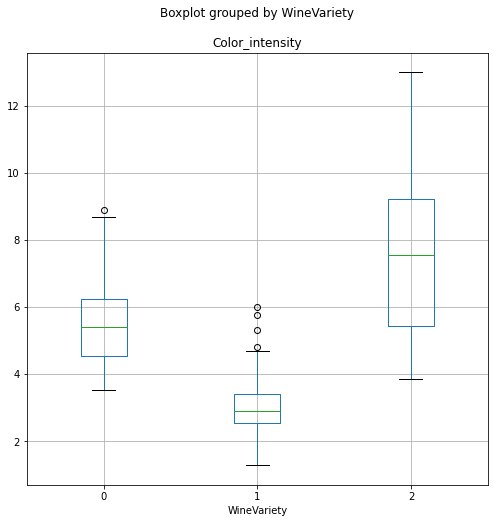

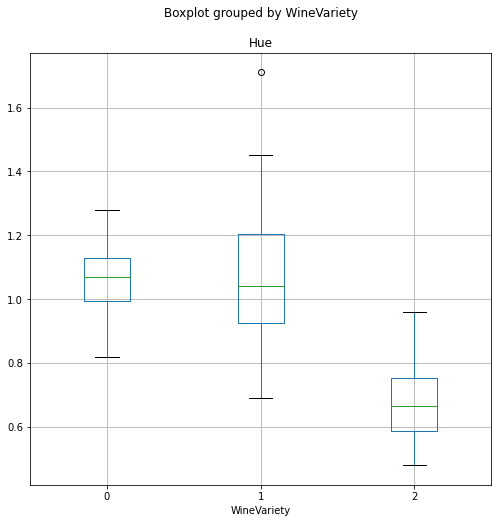

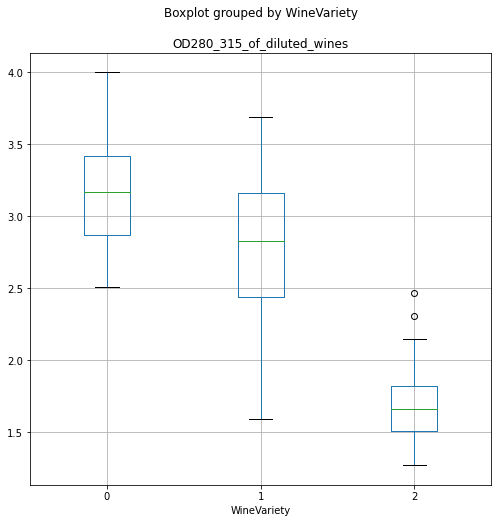

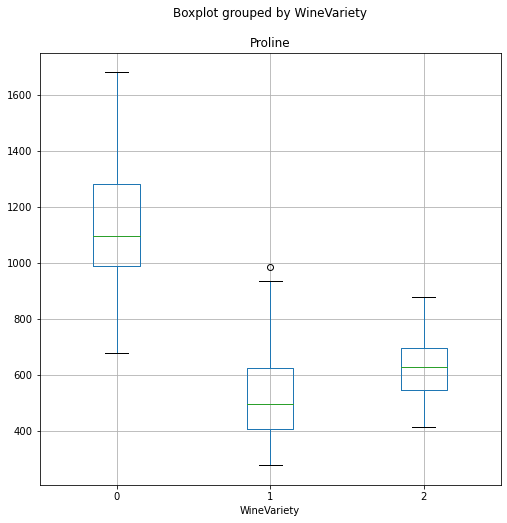

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

for col in features:
    data.boxplot(column=col, by=label, figsize=(8,8))
    plt.title(col)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

# split data on test and train sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

print('Training set: %d \nTest set: %d' % (x_train.shape[0], x_test.shape[0]))

Training set: 124 
Test set: 54


In [17]:
# training model
from sklearn.linear_model import LogisticRegression

# set regularization rate for avoiding overfitting
reg = 0.1

# train model
model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=1000).fit(x_train, y_train)
print(model)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
# make prediction
prediction = model.predict(x_test)
print('Predicted labels: ', prediction[:15])
print('Actual labels: ', y_test[:15])

Predicted labels:  [0 1 0 0 1 2 1 2 0 2 0 1 2 0 2]
Actual labels:  [0 1 0 0 1 2 1 2 0 2 0 1 2 0 2]


In [19]:
# look at metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.90      0.86      0.88        21
           2       0.93      0.93      0.93        15

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



In [21]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score

print('Overall accuracy:', accuracy_score(y_test, prediction))
print('Overall precision', precision_score(y_test, prediction, average='macro'))
print('Overall recall:', recall_score(y_test, prediction, average='macro'))

Overall accuracy: 0.9074074074074074
Overall precision 0.9093567251461989
Overall recall: 0.9116402116402117


We get Overall recall: 0.9116402116402117, but we must get overall recall more than 95%. Let's make data preprocessing.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

feature_columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[('preprocess', feature_transformer, feature_columns)])

# create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVC(probability=True))])

# fit the pipeline on training set
model = pipeline.fit(x_train, y_train)
print(model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('preprocess',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])],
                                   

In [26]:
prediction = model.predict(x_test)

In [27]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [28]:
print('Overall accuracy:', accuracy_score(y_test, prediction))
print('Overall precision', precision_score(y_test, prediction, average='macro'))
print('Overall recall:', recall_score(y_test, prediction, average='macro'))

Overall accuracy: 1.0
Overall precision 1.0
Overall recall: 1.0


## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [31]:
import joblib

# save model in the file
file_name = 'wine_prediction.pkl'
joblib.dump(model, file_name)


['wine_prediction.pkl']

In [36]:
import numpy as np

model_prod = joblib.load(file_name)

x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285]])
new_predict = model.predict(x_new)[0]
new_predict

0

In [35]:
x_new2 = np.array([[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
new_predict2 = model.predict(x_new2)[0]
new_predict2

1